In [4]:
from pprint import pprint
import numpy as np
from scipy.linalg import block_diag
import pandas as pd
import matplotlib.pyplot as plt
import time

In [5]:
def create_mat(dim, B_diag=4, B_side=-1):
    b=np.zeros((32,32))
    i,j = np.indices(b.shape)
    b[i==j] = B_diag
    b[i==j-1] = B_side
    b[i==j+1] = B_side
    B=np.kron(np.eye(dim),b)
    i,j = np.indices(B.shape)
    B[i==j+32] = B_side
    B[i==j-32] = B_side
    

    x=np.array([np.zeros((32*dim))]).reshape(-1,1)
    b=np.array([np.ones((32*dim))]).reshape(-1,1)
    
    return [B,x,b]

In [6]:
def Jacobi(create_mat, tol=10**(-7)):                                                                                                                                               
        A,x,b=create_mat
        
        D = np.diagflat(np.diag(A))
        R = A - D
        
        err_prev=-np.inf
        epochs=0
        while (np.linalg.norm(x, 2)-err_prev)>10**(-8):
            err_prev=np.linalg.norm(x, 2)
            x = np.dot(np.linalg.inv(D),(b - np.dot(R,x)))
            epochs+=1
        return x, epochs

In [8]:
def Block_Jacobi(blocks):
    x=[]
    epochs=0
    t=time.time()
    for i in range(int(32/blocks)):
        sol,ep=Jacobi(create_mat(blocks))
        x.extend(sol)
        epochs+=ep
    print("Block Jacobi method. Solution matrix size: {}, Total of epochs to converge: {}, Time elapsed:, {}s".format(len(x),epochs,time.time()-t))

In [9]:
Block_Jacobi(1)

Block Jacobi method. Solution matrix size: 1024, Total of epochs to converge: 896, Time elapsed:, 0.08381438255310059s


In [10]:
Block_Jacobi(2)

Block Jacobi method. Solution matrix size: 1024, Total of epochs to converge: 1072, Time elapsed:, 0.13660597801208496s


In [11]:
Block_Jacobi(4)

Block Jacobi method. Solution matrix size: 1024, Total of epochs to converge: 1512, Time elapsed:, 0.41886043548583984s


In [12]:
Block_Jacobi(8)

Block Jacobi method. Solution matrix size: 1024, Total of epochs to converge: 2388, Time elapsed:, 4.100033283233643s


In [13]:
def Gauss_Seidel(create_mat, tol=10**(-7)):
    A,x,b=create_mat

    U = np.triu(A, 1)
    L = np.tril(A)

    err_prev=-np.inf
    epochs=0
    while (np.linalg.norm(x, 2)-err_prev)>10**(-8):
        err_prev=np.linalg.norm(x, 2)
        x = np.dot(np.linalg.inv(L), (b - np.dot(U, x)))
        epochs+=1
    return x, epochs

In [14]:
def Block_Gauss_Seidel(blocks):
    x=[]
    epochs=0
    t=time.time()
    for i in range(int(32/blocks)):
        sol,ep=Gauss_Seidel(create_mat(blocks))
        x.extend(sol)
        epochs+=ep
    print("Block Gauss Seidel method. Solution matrix size: {}, Total of epochs to converge: {}, Time elapsed:, {}s".format(len(x),epochs,time.time()-t))

In [15]:
Block_Gauss_Seidel(1)

Block Gauss Seidel method. Solution matrix size: 1024, Total of epochs to converge: 576, Time elapsed:, 0.049857139587402344s


In [16]:
Block_Gauss_Seidel(2)

Block Gauss Seidel method. Solution matrix size: 1024, Total of epochs to converge: 608, Time elapsed:, 0.10172915458679199s


In [17]:
Block_Gauss_Seidel(4)

Block Gauss Seidel method. Solution matrix size: 1024, Total of epochs to converge: 800, Time elapsed:, 0.21639394760131836s


In [18]:
Block_Gauss_Seidel(8)

Block Gauss Seidel method. Solution matrix size: 1024, Total of epochs to converge: 1244, Time elapsed:, 2.127284288406372s


In [99]:
def create_sor_mat(dim, B_diag=4, B_side=-1):
    B=np.zeros((1024,1024))
    i,j = np.indices(B.shape)
    B[i==j] = B_diag
    B[i==j-1] = B_side
    B[i==j+1] = B_side
    B[i==j+32] = B_side
    B[i==j-32] = B_side
    

    x=np.array([np.zeros((32*dim))]).reshape(-1,1)
    b=np.array([np.ones((32*dim))]).reshape(-1,1)
    
    return [B,x,b]

In [15]:
def SOR(creat_sor_mat, tol=10**(-7)):
    A,x_s,b=create_mat  
    res=np.zeros((A.shape[0],20))

    omega_epochs=[]
    omegas=np.arange(1,2,0.05)
    i=0
    for omega in omegas:
        x=x_s

        D=np.diag(np.diag(A))
        M=np.dot((1/omega),D)+np.tril(A,-1)
        N=M-A

        error=np.linalg.norm(x, 2)
        epochs=0
        flag=True
        while flag:
            x=np.dot(np.dot((np.linalg.inv(M)),N),x)+np.dot((np.linalg.inv(M)),b)
            error_prev=error
            error=np.linalg.norm(x, 2)
            epochs+=1
            if error-error_prev<tol:
                flag=False
                res[:,i]=x.squeeze()
                omega_epochs.append([np.round(omega,2),epochs])
                print("Omega: ", np.round(omega,2)," Epochs:",epochs)
                i+=1

    return [pd.DataFrame(res), pd.DataFrame(omega_epochs)]

def draw_omega(omega_opt):
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.plot(omega_opt[0], omega_opt[1], label=('Omega vs No of epochs for convergeance'))
    ax.set_ylabel('Number of epochs\n')
    ax.set_xlabel('Omega')
    ax.set_title('Omega vs No of epochs for convergeance')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

In [17]:
res,omega=SOR(create_mat(32), tol=10**(-7))

Omega:  1.0  Epochs: 2062
Omega:  1.05  Epochs: 1875
Omega:  1.1  Epochs: 1704
Omega:  1.15  Epochs: 1547
Omega:  1.2  Epochs: 1402
Omega:  1.25  Epochs: 1267
Omega:  1.3  Epochs: 1142
Omega:  1.35  Epochs: 1026
Omega:  1.4  Epochs: 916
Omega:  1.45  Epochs: 814
Omega:  1.5  Epochs: 717
Omega:  1.55  Epochs: 625
Omega:  1.6  Epochs: 538
Omega:  1.65  Epochs: 454
Omega:  1.7  Epochs: 372
Omega:  1.75  Epochs: 291
Omega:  1.8  Epochs: 204
Omega:  1.85  Epochs: 40
Omega:  1.9  Epochs: 27
Omega:  1.95  Epochs: 19


In [18]:
omega

,0,1
0,1.00,2062
1,1.05,1875
2,1.10,1704
3,1.15,1547
4,1.20,1402
5,1.25,1267
6,1.30,1142
7,1.35,1026
8,1.40,916
9,1.45,814


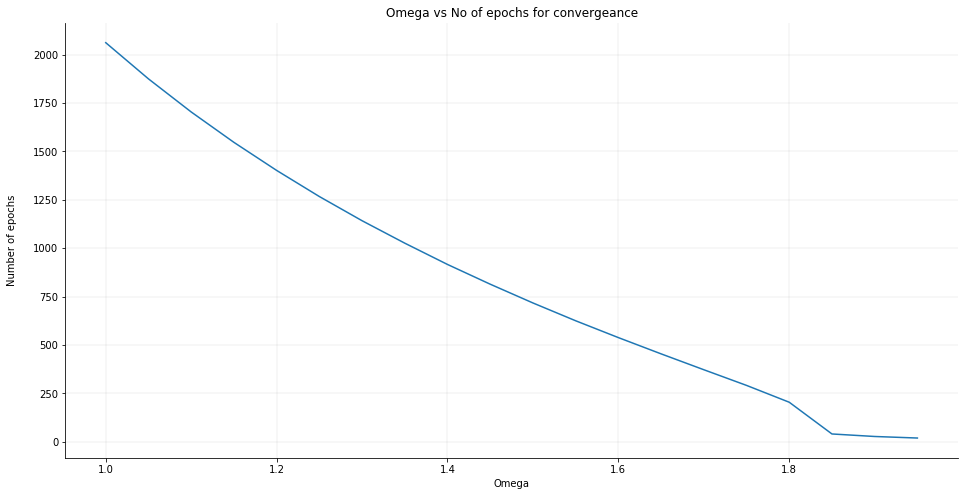

In [19]:
draw_omega(omega)

# Create the matrix T

In [100]:
T=create_sor_mat(32)[0]

# Calculate undamped Jacobi Iteration Matrix

In [101]:
M=np.eye(B.shape[0])-(np.linalg.inv(np.diag(np.diag(T)))@T)

# Calculate the eigenvalues of the matrix

In [102]:
m=np.linalg.eig(M)

# Get the maximum eigenvalues

In [103]:
mmax=np.max(np.abs(S[0]))

# Calculate wopt

In [104]:
wopt=1+np.power(mmax/(1+np.sqrt(1-(mmax**2))),2)

In [105]:
wopt

1.8263905415885064